# Multinomial Regression

#### Classify university students based on the program enrolled. Perform multinomial regression on the enrollment category. (General, Academic, Vocational)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
uni_df = pd.read_csv(r"D:\360digi\DS\Sharath\Multinomial_Regression_E_Learning\handson\Datasets_Multinomial\mdata.csv")
uni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  200 non-null    int64 
 1   id          200 non-null    int64 
 2   female      200 non-null    object
 3   ses         200 non-null    object
 4   schtyp      200 non-null    object
 5   prog        200 non-null    object
 6   read        200 non-null    int64 
 7   write       200 non-null    int64 
 8   math        200 non-null    int64 
 9   science     200 non-null    int64 
 10  honors      200 non-null    object
dtypes: int64(6), object(5)
memory usage: 17.3+ KB


In [4]:
uni_df.columns

Index(['Unnamed: 0', 'id', 'female', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'honors'],
      dtype='object')

In [5]:
uni_df.drop(['Unnamed: 0','id', 'female','schtyp'], axis = 1, inplace = True)

In [6]:
uni_df.head()

,ses,prog,read,write,math,science,honors
0,low,vocation,34,35,41,29,not enrolled
1,middle,general,34,33,41,36,not enrolled
2,high,vocation,39,39,44,26,not enrolled
3,low,vocation,37,37,42,33,not enrolled
4,middle,vocation,39,31,40,39,not enrolled


In [7]:
uni_df.describe()

,read,write,math,science
count,200.000000,200.000000,200.000000,200.000000
mean,52.230000,52.775000,52.645000,51.850000
std,10.252937,9.478586,9.368448,9.900891
min,28.000000,31.000000,33.000000,26.000000
25%,44.000000,45.750000,45.000000,44.000000
50%,50.000000,54.000000,52.000000,53.000000
75%,60.000000,60.000000,59.000000,58.000000
max,76.000000,67.000000,75.000000,74.000000


In [8]:
uni_df.prog.value_counts()

academic    105
vocation     50
general      45
Name: prog, dtype: int64

In [ ]:
# general: 45, has the least count

array([[<AxesSubplot:title={'center':'math'}, xlabel='[prog]'>,
        <AxesSubplot:title={'center':'read'}, xlabel='[prog]'>],
       [<AxesSubplot:title={'center':'science'}, xlabel='[prog]'>,
        <AxesSubplot:title={'center':'write'}, xlabel='[prog]'>]],
      dtype=object)

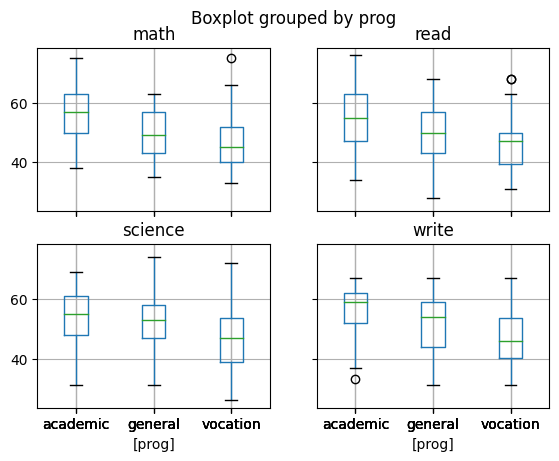

In [9]:
# Visualization
uni_df.boxplot(by = "prog")

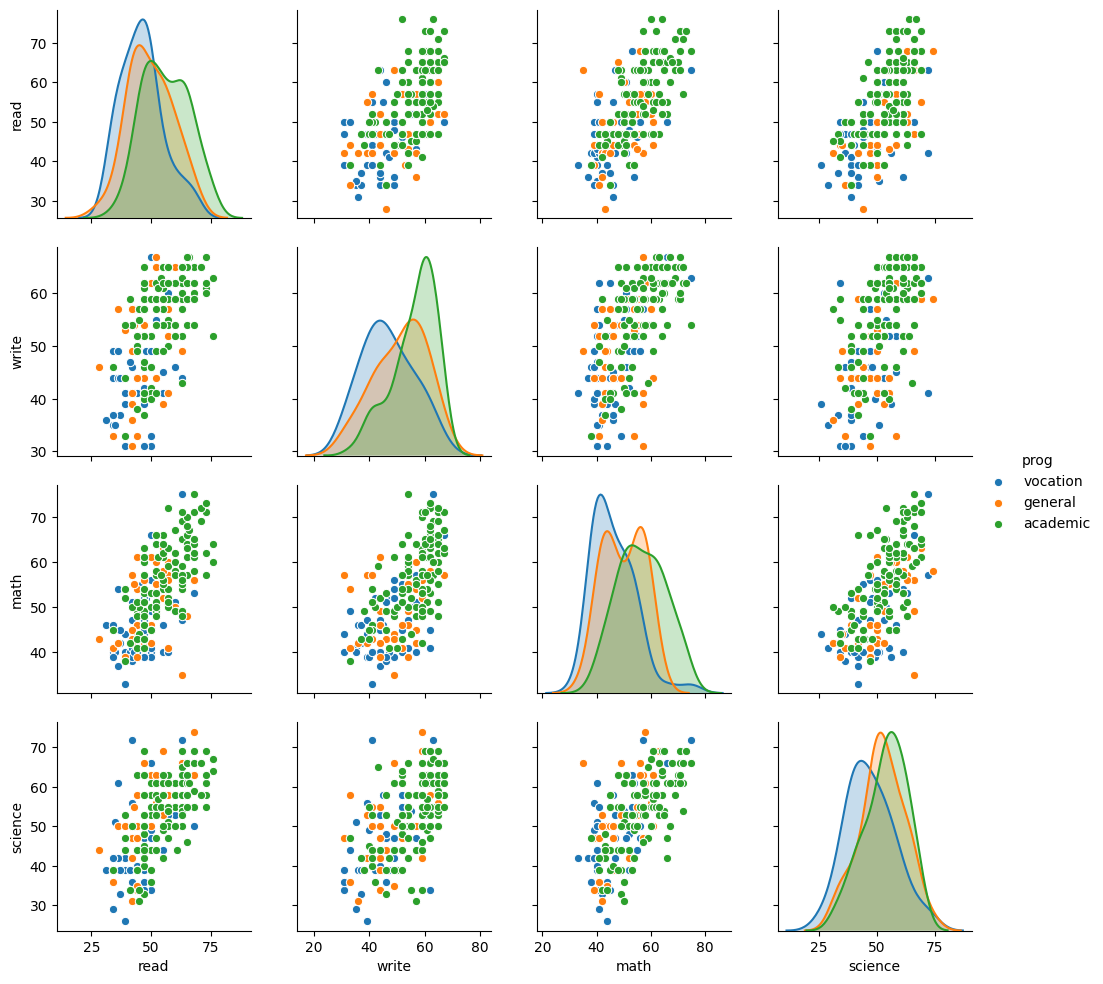

In [10]:
sns.pairplot(uni_df, hue = "prog") 

In [11]:
uni_df.corr()

,read,write,math,science
read,1.000000,0.596776,0.662280,0.630158
write,0.596776,1.000000,0.617449,0.570442
math,0.662280,0.617449,1.000000,0.630733
science,0.630158,0.570442,0.630733,1.000000


In [12]:
uni_df.head()

,ses,prog,read,write,math,science,honors
0,low,vocation,34,35,41,29,not enrolled
1,middle,general,34,33,41,36,not enrolled
2,high,vocation,39,39,44,26,not enrolled
3,low,vocation,37,37,42,33,not enrolled
4,middle,vocation,39,31,40,39,not enrolled


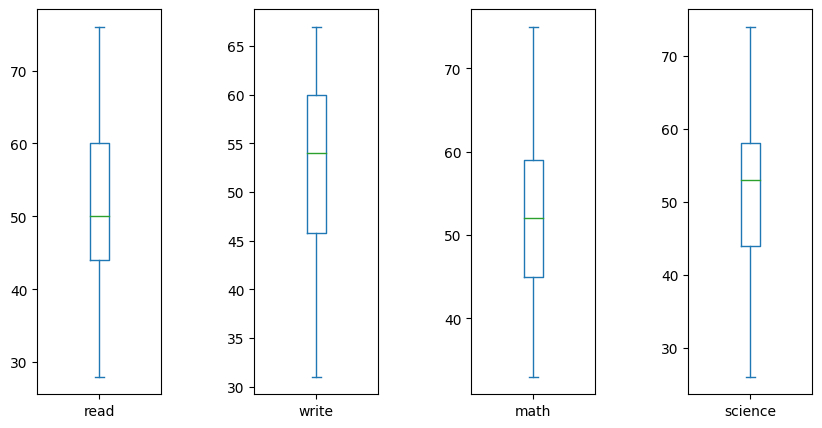

In [13]:
# box plot visualisation
uni_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (10,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [14]:
# Seperating input and output variables 
X = pd.DataFrame(uni_df.iloc[:, [0,2,3,4,5,6]])
Y = pd.DataFrame(uni_df.iloc[:, 1])

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ses      200 non-null    object
 1   read     200 non-null    int64 
 2   write    200 non-null    int64 
 3   math     200 non-null    int64 
 4   science  200 non-null    int64 
 5   honors   200 non-null    object
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [16]:
X.isna().sum() # no NA values

ses        0
read       0
write      0
math       0
science    0
honors     0
dtype: int64

In [17]:
X.isnull().sum()  #no missing values

ses        0
read       0
write      0
math       0
science    0
honors     0
dtype: int64

In [18]:
# Select numeric features for data preprocessing
numeric_features = X.select_dtypes(exclude = ['object']).columns
print(numeric_features)

Index(['read', 'write', 'math', 'science'], dtype='object')


In [19]:
categorical_features = X.select_dtypes(include = ['object']).columns
print(categorical_features)

Index(['ses', 'honors'], dtype='object')


In [20]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(X)

In [21]:
scaled_data = pd.DataFrame(scale.transform(X), columns = numeric_features)
scaled_data.describe()

,read,write,math,science
count,200.000000,200.000000,200.000000,200.000000
mean,0.504792,0.604861,0.467738,0.538542
std,0.213603,0.263294,0.223058,0.206269
min,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.409722,0.285714,0.375000
50%,0.458333,0.638889,0.452381,0.562500
75%,0.666667,0.805556,0.619048,0.666667
max,1.000000,1.000000,1.000000,1.000000


In [22]:
X.ses.unique()

array(['low', 'middle', 'high'], dtype=object)

In [23]:
X.honors.unique()

array(['not enrolled', 'enrolled'], dtype=object)

In [24]:
## Encoding Categorical features
encoding_pipeline = Pipeline([('onehot', OneHotEncoder())])

preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, categorical_features)])

clean =  preprocess_pipeline.fit(X)

In [25]:
encode_data = pd.DataFrame(clean.transform(X))
encode_data

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
195,1.0,0.0,0.0,1.0,0.0
196,0.0,0.0,1.0,1.0,0.0
197,0.0,0.0,1.0,1.0,0.0
198,0.0,0.0,1.0,1.0,0.0


In [26]:
# To get feature names for Categorical columns after Onehotencoding 
encode_data.columns = clean.get_feature_names_out(input_features = X.columns)
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   categorical__ses_high             200 non-null    float64
 1   categorical__ses_low              200 non-null    float64
 2   categorical__ses_middle           200 non-null    float64
 3   categorical__honors_enrolled      200 non-null    float64
 4   categorical__honors_not enrolled  200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [27]:
X1 = pd.concat([scaled_data, encode_data], axis = 1)  # concatenated data will have new sequential index
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   read                              200 non-null    float64
 1   write                             200 non-null    float64
 2   math                              200 non-null    float64
 3   science                           200 non-null    float64
 4   categorical__ses_high             200 non-null    float64
 5   categorical__ses_low              200 non-null    float64
 6   categorical__ses_middle           200 non-null    float64
 7   categorical__honors_enrolled      200 non-null    float64
 8   categorical__honors_not enrolled  200 non-null    float64
dtypes: float64(9)
memory usage: 14.2 KB


In [28]:
X1.rename(columns = {'categorical__honors_not enrolled':'categorical__honors_not_enrolled'}, inplace = True)

In [29]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   read                              200 non-null    float64
 1   write                             200 non-null    float64
 2   math                              200 non-null    float64
 3   science                           200 non-null    float64
 4   categorical__ses_high             200 non-null    float64
 5   categorical__ses_low              200 non-null    float64
 6   categorical__ses_middle           200 non-null    float64
 7   categorical__honors_enrolled      200 non-null    float64
 8   categorical__honors_not_enrolled  200 non-null    float64
dtypes: float64(9)
memory usage: 14.2 KB


In [30]:
# Splitting data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.2, random_state = 0, stratify = Y)

# Multinomial Regression

In [31]:
# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
logmodel = LogisticRegression(multi_class = "multinomial", solver = "newton-cg")

In [32]:
# Train the model
model = logmodel.fit(X_train, Y_train.prog)

In [33]:
# Train accuracy 
train_predict = model.predict(X_train)

In [34]:
# Train predictions
accuracy_score(Y_train.prog, train_predict) 

0.64375

In [35]:
# Predict the results for Test Data
test_predict = model.predict(X_test)

In [36]:
# Test accuracy 
accuracy_score(Y_test.prog, test_predict)

0.625

### Hyperparameter Optimization

In [37]:
# Hyperparameter Optimization
logmodel1 = LogisticRegression(multi_class = "multinomial")

In [38]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [39]:
# from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logmodel1, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, Y_train.prog)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [40]:
# Best estimator
best_clf.best_estimator_

LogisticRegression(C=4.281332398719396, multi_class='multinomial')

In [41]:
print (f'Accuracy - : {best_clf.score(X_train, Y_train):.3f}')

Accuracy - : 0.644


In [42]:
print (f'Accuracy - : {best_clf.score(X_test, Y_test):.3f}')

Accuracy - : 0.625


In [43]:
# Fitting on Full data
best_clf1 = clf.fit(X1, Y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [44]:
best_clf1.best_estimator_

LogisticRegression(C=0.03359818286283781, multi_class='multinomial')

In [45]:
print (f'Accuracy - : {best_clf1.score(X1, Y):.3f}')

Accuracy - : 0.530


In [46]:
print (f'Accuracy - : {best_clf1.score(X_test, Y_test):.3f}')

Accuracy - : 0.550
